# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


### 1. importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [4]:
corona_dataset_csv=pd.read_csv('./downloads/covid19_Confirmed_dataset.csv')
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### 2.1 Let's check the shape of the dataframe

In [5]:
corona_dataset_csv.shape

(266, 104)

### 2.2: Delete the useless columns

In [7]:
df=corona_dataset_csv.drop(['Lat', 'Long'], axis=1)

###  2.3: Aggregating the rows by the country

In [9]:
corona_ds_Agg=df.groupby('Country/Region').sum()

In [10]:
corona_ds_Agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6


### 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

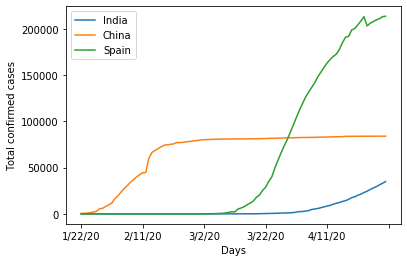

In [17]:
corona_ds_Agg.loc['India'].plot()
corona_ds_Agg.loc['China'].plot()
corona_ds_Agg.loc['Spain'].plot()
plt.xlabel('Days')
plt.ylabel('Total confirmed cases')

plt.legend()

### 3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

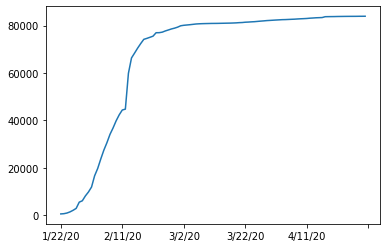

In [19]:
corona_ds_Agg.loc['China'].plot()

### 3.1: caculating the first derivative of the curve

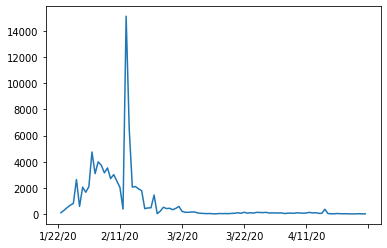

In [22]:
corona_ds_Agg.loc['China'].diff().plot()

### 3.2: find maxmimum infection rate for China

In [25]:
print(corona_ds_Agg.loc['China'].diff().max())
print(corona_ds_Agg.loc['Italy'].diff().max())
print(corona_ds_Agg.loc['Spain'].diff().max())



15136.0
6557.0
9630.0


In [24]:
corona_ds_Agg.loc['India'].diff().max()

1893.0

###  3.3: find maximum infection rate for all of the countries. 

In [34]:
countries= list(corona_ds_Agg.index)
max_infected_rate=[]

for c in countries:
    max_infected_rate.append(corona_ds_Agg.loc[c].diff().max())
max_infected_rate
corona_ds_Agg['Max_Infection_Rate']=max_infected_rate

In [35]:
corona_ds_Agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_Infection_Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


### 3.4: create a new dataframe with only needed column 

In [36]:
corona_data= pd.DataFrame(corona_ds_Agg['Max_Infection_Rate'])

In [37]:
corona_data

,Max_Infection_Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


### 4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### 4.1 : importing the dataset

In [40]:
world_happiness_report=pd.read_csv('./Downloads/worldwide_happiness_report.csv')
world_happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


###  4.2: let's drop the useless columns 

In [41]:
useless_columns=['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']

In [45]:
#world_happiness_report.drop(useless_columns, axis=1, inplace=True)
world_happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


###  4.3: changing the indices of the dataframe

In [47]:
world_happiness_report.set_index('Country or region', inplace=True)

### 4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [51]:
corona_data

,Max_Infection_Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


#### wolrd happiness report Dataset :

In [54]:
world_happiness_report.shape

(156, 4)

In [52]:
data=corona_data.join(world_happiness_report, how='inner')
data.head(5)

,Max_Infection_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [53]:
data.shape

(143, 5)

###  4.5: correlation matrix 

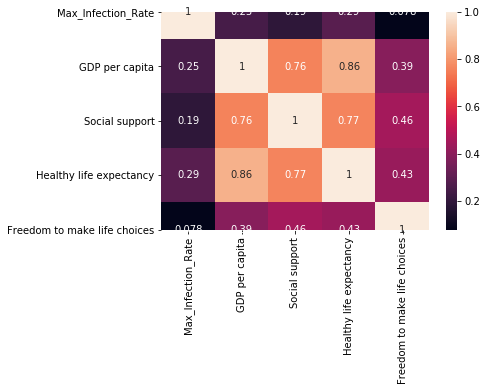

In [62]:
sns.heatmap(data.corr(), annot=True)

###  5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [64]:
data.head(5)

,Max_Infection_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


###  5.1: Plotting GDP vs maximum Infection rate

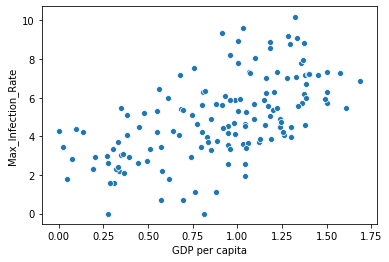

In [66]:
x=data['GDP per capita']
y=data['Max_Infection_Rate']
sns.scatterplot(x,np.log(y))

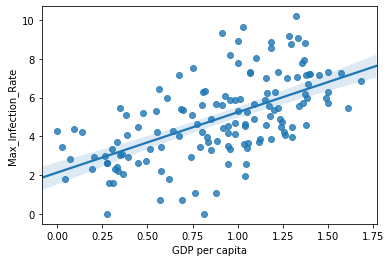

In [67]:
sns.regplot(x,np.log(y))

In [ ]:
### plot shows more developed countries prone to more infected rates

###  5.2: Plotting Social support vs maximum Infection rate

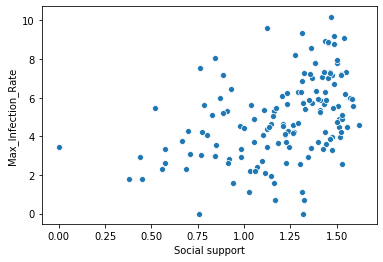

In [70]:
x=data['Social support']
y=data['Max_Infection_Rate']
sns.scatterplot(x,np.log(y))

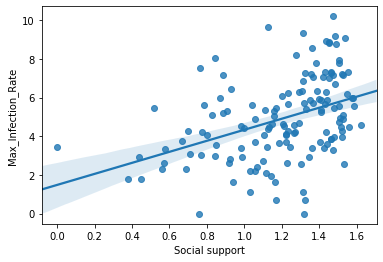

In [71]:
x=data['Social support']
y=data['Max_Infection_Rate']
sns.regplot(x,np.log(y))

###  5.3: Plotting Healthy life expectancy vs maximum Infection rate

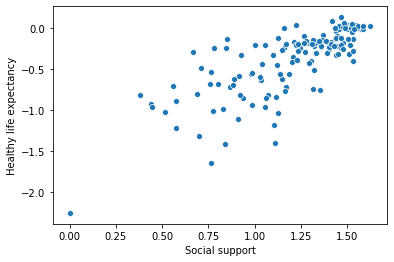

In [73]:
x=data['Social support']
y=data['Healthy life expectancy']
sns.scatterplot(x,np.log(y))

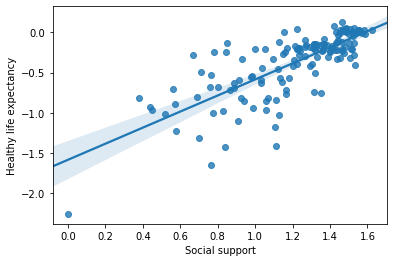

In [74]:
x=data['Social support']
y=data['Healthy life expectancy']
sns.regplot(x,np.log(y))

###  5.4: Plotting Freedom to make life choices vs maximum Infection rate

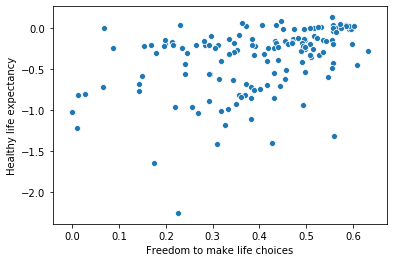

In [76]:
x=data['Freedom to make life choices']
y=data['Healthy life expectancy']
sns.scatterplot(x,np.log(y))

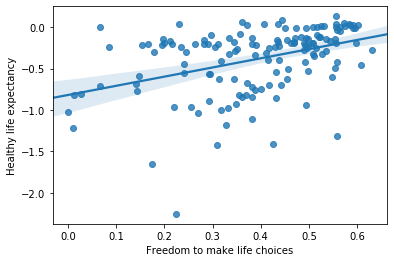

In [75]:
x=data['Freedom to make life choices']
y=data['Healthy life expectancy']
sns.regplot(x,np.log(y))